https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [70]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn import tree
import matplotlib.pyplot as plt


In [58]:
df = pd.read_csv('../../data/temps.csv')
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Lidia con las variables categóricas del dataset

In [59]:
df = pd.get_dummies(df)
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


### 3. Divide en train y test

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x = np.array(df.drop(['actual'], axis=1))
print('x.shape:', x.shape)
y = np.array(df['actual'])
print('y.shape:', y.shape)

x.shape: (348, 17)
y.shape: (348,)


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (278, 17)
x_test: (70, 17)
y_train: (278,)
y_test: (70,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [63]:
model = DecisionTreeRegressor(random_state=42)

In [64]:
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

### 5. Calcula su MAE
Sin usar sklearn

In [65]:
y_pred = model.predict(x_test)

In [66]:
mae_calculado = np.mean(abs(y_test-y_pred))
mae_calculado

4.885714285714286

In [67]:
mae_modelo = mean_absolute_error(y_test, y_pred)
mae_modelo

4.885714285714286

### 6. Calcula su MAPE
Sin usar sklearn

In [68]:
mape_calculado = np.mean((abs(y_test-y_pred))/y_test * 100)
mape_calculado

7.703220475099387

In [69]:
mape_modelo = mean_absolute_percentage_error(y_test, y_pred) * 100
mape_modelo

7.703220475099386

### 7. Representa el árbol de decision

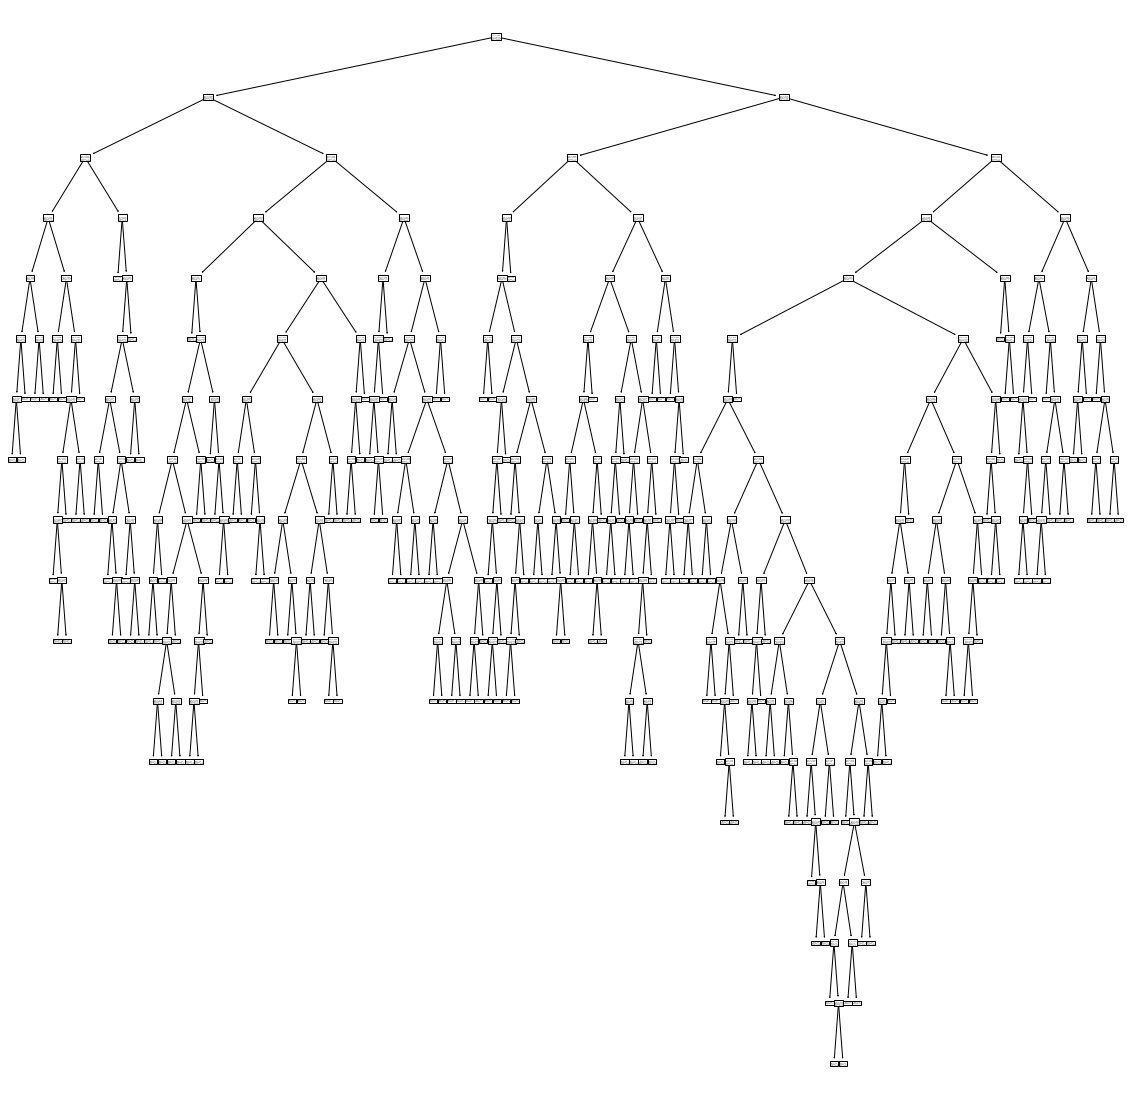

In [73]:
plt.figure(figsize=(20,20))
tree.plot_tree(model);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [74]:
model_max_depth_3 = DecisionTreeRegressor(max_depth=3, random_state=42)

In [75]:
model_max_depth_3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 9. Vuelve a calcular si MAE

In [76]:
y_pred_2 = model_max_depth_3.predict(x_test)

In [77]:
mae_calculado_2 = np.mean(abs(y_test-y_pred_2))
mae_calculado_2

4.5567196265742504

In [79]:
mae_modelo_2 = mean_absolute_error(y_test, y_pred_2)
mae_modelo_2

4.5567196265742504

### 10. Vuelve a representar su árbol

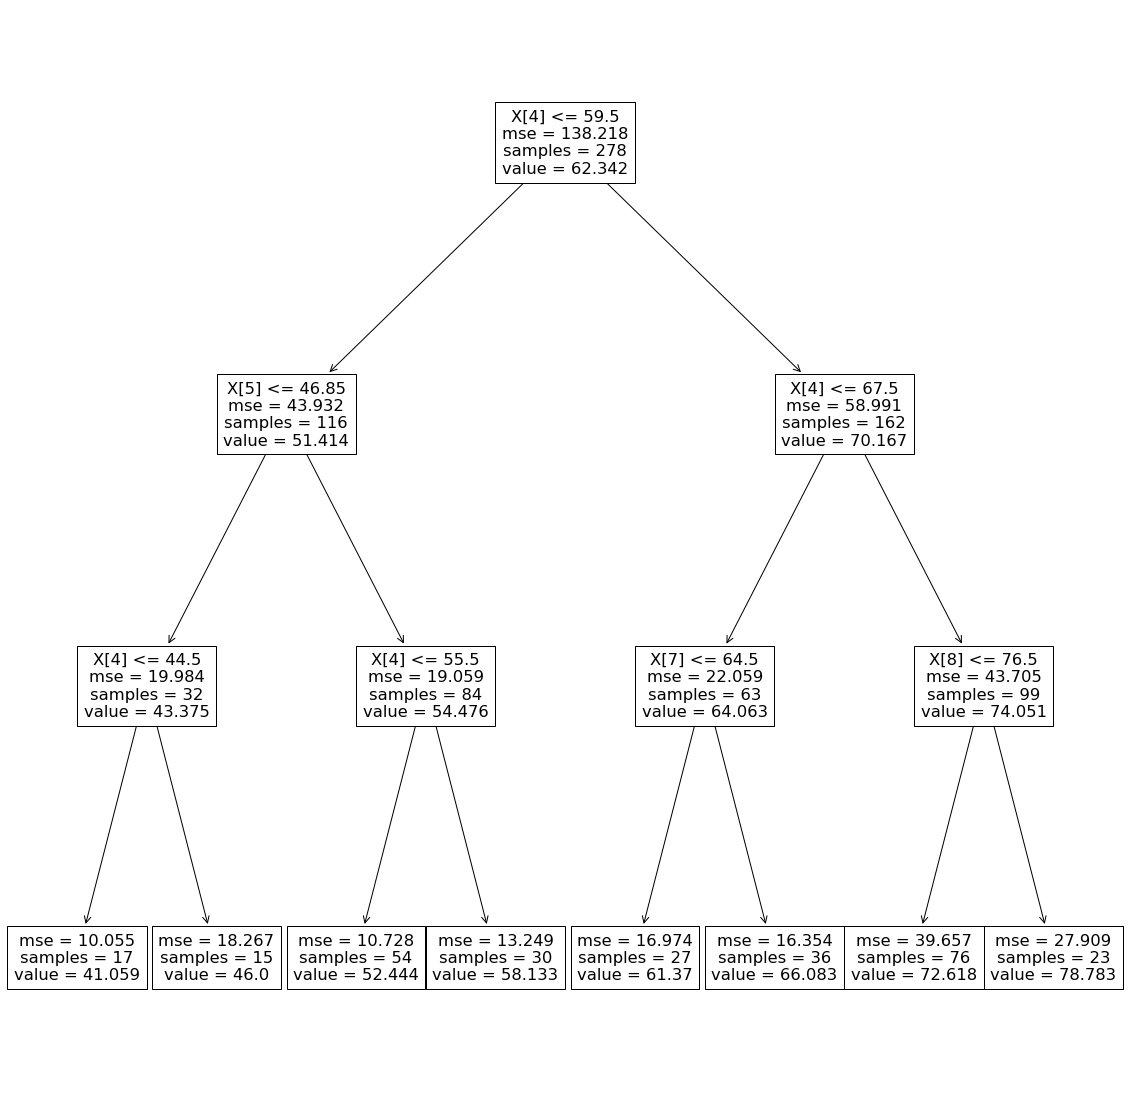

In [80]:
plt.figure(figsize=(20,20))
tree.plot_tree(model_max_depth_3);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [82]:
carac_importantes = model_max_depth_3.feature_importances_
carac_importantes

array([0.        , 0.        , 0.        , 0.        , 0.88020751,
       0.08841159, 0.        , 0.01060993, 0.02077097, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [83]:
lista_carac_importantes = list(carac_importantes)
lista_carac_importantes

[0.0,
 0.0,
 0.0,
 0.0,
 0.8802075128034851,
 0.08841158765377367,
 0.0,
 0.01060993136963865,
 0.02077096817310268,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [94]:
importancia_cada_una = [(caracteristica, round(importancia,2)) for caracteristica, importancia in zip(df.columns, lista_carac_importantes)]
importancia_cada_una = sorted(importancia_cada_una, key= lambda x: x[1], reverse = True)
[print('Variable: {:20} Importancia: {}'.format(var, imp)) for var, imp in importancia_cada_una]

Variable: temp_1               Importancia: 0.88
Variable: average              Importancia: 0.09
Variable: forecast_acc         Importancia: 0.02
Variable: forecast_noaa        Importancia: 0.01
Variable: year                 Importancia: 0.0
Variable: month                Importancia: 0.0
Variable: day                  Importancia: 0.0
Variable: temp_2               Importancia: 0.0
Variable: actual               Importancia: 0.0
Variable: forecast_under       Importancia: 0.0
Variable: friend               Importancia: 0.0
Variable: week_Fri             Importancia: 0.0
Variable: week_Mon             Importancia: 0.0
Variable: week_Sat             Importancia: 0.0
Variable: week_Sun             Importancia: 0.0
Variable: week_Thurs           Importancia: 0.0
Variable: week_Tues            Importancia: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]